In [25]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [26]:
df = pd.read_csv('prelim_datasets/heart_disease_risk.csv')

In [27]:
df.head()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,46.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,66.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,60.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chest_Pain           70000 non-null  float64
 1   Shortness_of_Breath  70000 non-null  float64
 2   Fatigue              70000 non-null  float64
 3   Palpitations         70000 non-null  float64
 4   Dizziness            70000 non-null  float64
 5   Swelling             70000 non-null  float64
 6   Pain_Arms_Jaw_Back   70000 non-null  float64
 7   Cold_Sweats_Nausea   70000 non-null  float64
 8   High_BP              70000 non-null  float64
 9   High_Cholesterol     70000 non-null  float64
 10  Diabetes             70000 non-null  float64
 11  Smoking              70000 non-null  float64
 12  Obesity              70000 non-null  float64
 13  Sedentary_Lifestyle  70000 non-null  float64
 14  Family_History       70000 non-null  float64
 15  Chronic_Stress       70000 non-null 

In [29]:
df.describe()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.499229,0.500586,0.498571,0.498729,0.501414,0.498929,0.501500,0.502457,0.497429,0.499214,0.500643,0.502971,0.499157,0.503543,0.497629,0.499957,0.548929,54.461986,0.500000
std,0.500003,0.500003,0.500002,0.500002,0.500002,0.500002,0.500001,0.499998,0.499997,0.500003,0.500003,0.499995,0.500003,0.499991,0.499998,0.500004,0.497604,16.410794,0.500004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,56.000000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,67.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,84.000000,1.000000


In [30]:
# plt.figure(figsize=(15, 10))
# for i, col in enumerate(df.select_dtypes(include=np.number).columns):
#     plt.subplot(3, 3, i+1)
#     sns.histplot(df[col], kde=True)
#     plt.title(f'Distribution of {col}')
# plt.tight_layout()
# plt.show()

In [31]:
missing_percentage = df.isnull().mean() * 100
print("Missing values percentage:\n", missing_percentage)

Missing values percentage:
 Chest_Pain             0.0
Shortness_of_Breath    0.0
Fatigue                0.0
Palpitations           0.0
Dizziness              0.0
Swelling               0.0
Pain_Arms_Jaw_Back     0.0
Cold_Sweats_Nausea     0.0
High_BP                0.0
High_Cholesterol       0.0
Diabetes               0.0
Smoking                0.0
Obesity                0.0
Sedentary_Lifestyle    0.0
Family_History         0.0
Chronic_Stress         0.0
Gender                 0.0
Age                    0.0
Heart_Risk             0.0
dtype: float64


In [32]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")
df_no_duplicates = df.drop_duplicates()

Number of duplicate rows: 6245


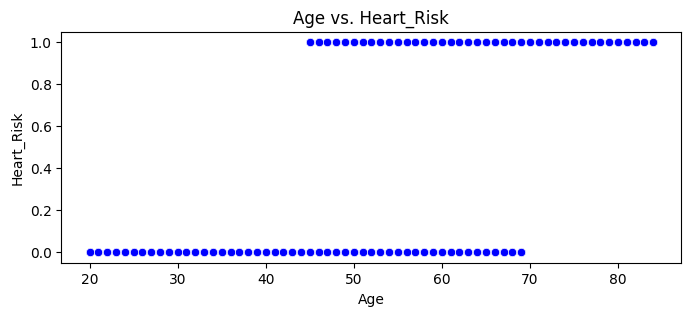

In [33]:
# Setting variables for the regression
independent_var = "Age"
dependent_var = "Heart_Risk"


plt.figure(figsize=(8,3))
sns.scatterplot(x=df[independent_var], y=df[dependent_var], color="blue")
plt.xlabel(independent_var)
plt.ylabel(dependent_var)
plt.title(f"{independent_var} vs. {dependent_var}")
plt.show()

In [34]:
# # Label Encoding for Ordered Categories
# ordinal_columns = ["Thyroid_Cancer_Risk"]
# encoder = LabelEncoder()

# for col in ordinal_columns:
#     df[col] = encoder.fit_transform(df[col])

In [35]:
# OPTIONAL: Converting Unordered Categories (Use if changing variables into on of these categories)

# # One-Hot Encoding for Unordered Categories
# df = pd.get_dummies(df, columns=["Gender" , "Country" , "Ethnicity" , "Family_History" , "Radiation_Exposure" , "Iodine_Deficiency" , "Smoking",
#                                  "Obesity", "Diabetes", "Diagnosis"], drop_first=True)

# # Mapping for Binary Categories
# diagnosis_mapping = {"Benign": 0, "Malignant": 1}
# df["Diagnosis"] = df["Diagnosis"].map(diagnosis_mapping)

In [36]:
def remove_outliers(df, columns, threshold=3):
    df_clean = df.copy()
    for col in columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            z_scores = np.abs(stats.zscore(df[col].dropna()))
            outliers = df[col].dropna()[z_scores > threshold].index
            print(f"Found {len(outliers)} outliers in {col}")
            df_clean.loc[outliers, col] = np.nan
    return df_clean

numerical_cols = df.select_dtypes(include=np.number).columns
df_no_outliers = remove_outliers(df, numerical_cols)

Found 0 outliers in Chest_Pain
Found 0 outliers in Shortness_of_Breath
Found 0 outliers in Fatigue
Found 0 outliers in Palpitations
Found 0 outliers in Dizziness
Found 0 outliers in Swelling
Found 0 outliers in Pain_Arms_Jaw_Back
Found 0 outliers in Cold_Sweats_Nausea
Found 0 outliers in High_BP
Found 0 outliers in High_Cholesterol
Found 0 outliers in Diabetes
Found 0 outliers in Smoking
Found 0 outliers in Obesity
Found 0 outliers in Sedentary_Lifestyle
Found 0 outliers in Family_History
Found 0 outliers in Chronic_Stress
Found 0 outliers in Gender
Found 0 outliers in Age
Found 0 outliers in Heart_Risk


In [37]:
def normalize_data(df, columns):
    df_norm = df.copy()
    for col in columns:
        df_norm[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    return df_norm

def standardize_data(df, columns):
    df_std = df.copy()
    for col in columns:
        df_std[col] = (df[col] - df[col].mean()) / df[col].std()
    return df_std

df_normalized = normalize_data(df_no_outliers, numerical_cols)
df_standardized = standardize_data(df_no_outliers, numerical_cols)

In [38]:
df_cleaned = df_no_outliers.fillna(df_no_outliers.median())
df_normalized

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.437500,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.406250,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.718750,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.625000,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.765625,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.156250,0.0
69996,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.562500,1.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.515625,0.0
69998,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.578125,1.0


In [39]:
df.head()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,46.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,66.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,60.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0


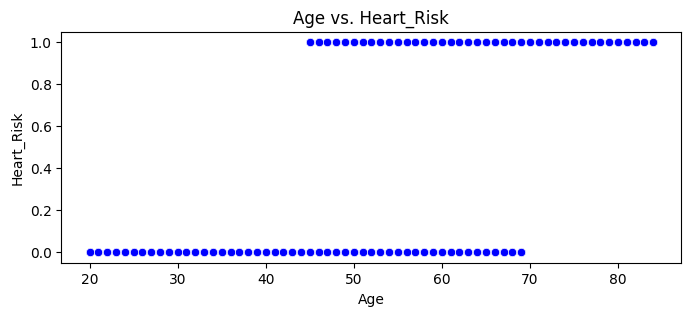

In [40]:
plt.figure(figsize=(8,3))
sns.scatterplot(x=df_cleaned[independent_var], y=df_cleaned[dependent_var], color="blue")
plt.xlabel(independent_var)
plt.ylabel(dependent_var)
plt.title(f"{independent_var} vs. {dependent_var}")
plt.show()

In [41]:
X = df_cleaned[[independent_var]]
Y = df_cleaned[dependent_var]

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [43]:
print("Training Set:")
print(X_train)
print(Y_train)

print("\nTesting Set:")
print(X_test)
print(Y_test)

Training Set:
        Age
47339  58.0
67456  74.0
12308  47.0
32557  30.0
664    25.0
...     ...
37194  71.0
6265   27.0
54886  81.0
860    84.0
15795  54.0

[56000 rows x 1 columns]
47339    1.0
67456    1.0
12308    1.0
32557    0.0
664      0.0
        ... 
37194    1.0
6265     0.0
54886    1.0
860      1.0
15795    0.0
Name: Heart_Risk, Length: 56000, dtype: float64

Testing Set:
        Age
46730  58.0
48393  38.0
41416  43.0
34506  69.0
43725  65.0
...     ...
21525  38.0
16276  76.0
24390  43.0
28061  69.0
63452  83.0

[14000 rows x 1 columns]
46730    0.0
48393    0.0
41416    0.0
34506    0.0
43725    1.0
        ... 
21525    0.0
16276    1.0
24390    0.0
28061    1.0
63452    1.0
Name: Heart_Risk, Length: 14000, dtype: float64


In [44]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [45]:
print(f"Intercept (b): {model.intercept_:.2f}") 
print(f"Coefficient (m): {model.coef_[0]:.2f}") 

Intercept (b): -0.50
Coefficient (m): 0.02


In [46]:
Y_pred = model.predict(X_test)

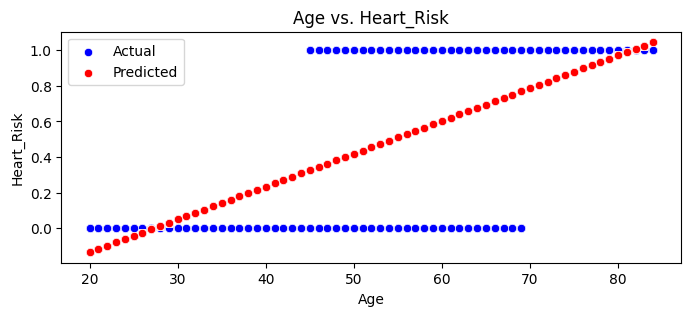

In [47]:
plt.figure(figsize=(8,3))

# Scatter plot of actual salaries
sns.scatterplot(x=X_test.values.flatten(), y=Y_test.values.flatten(), color="blue", label="Actual")

# Scatter plot of predicted salaries
sns.scatterplot(x=X_test.values.flatten(), y=Y_pred.flatten(), color="red", label="Predicted")

plt.xlabel(independent_var)
plt.ylabel(dependent_var)
plt.title(f"{independent_var} vs. {dependent_var}")
plt.legend()
plt.show()

In [48]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
salary_variance = np.var(Y_test)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"{dependent_var} Variance: {salary_variance:.2f}")

Mean Squared Error (MSE): 0.16
R² Score: 0.37
Heart_Risk Variance: 0.25
